# Actividad 5: Uso de software para búsqueda.

Johan Ronaldo Padilla Castañeda -
2109556


Inteligencia Artificial y Redes Neuronales - N1

Grupo: 007

---

### Objetivo

*Entrenar un modelo de Red Neuronal Prealimentada (tipo feedforward).*

---

1. Cargar Librerías

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
print(tf.__version__)

2.15.0


2. Cargar Datos

In [3]:
(train_data, train_labels), (test_data, test_label) = keras.datasets.mnist.load_data()
assert train_data.shape == (60000, 28, 28)
assert test_data.shape == (10000, 28, 28)
assert train_labels.shape == (60000,)
assert test_label.shape == (10000,)

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
label_names = ["Cero", "Uno", "Dos", "Tres", "Cuatro", "Cinco", "Seis", "Siete", "Ocho", "Nueve"]

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
len(train_labels)

60000

In [9]:
test_label

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
len(test_label)

10000

3. Pre-procesamiento de Datos

In [11]:
train_data = train_data / 255.0
test_data = test_data / 255.0

<function matplotlib.pyplot.show(close=None, block=None)>

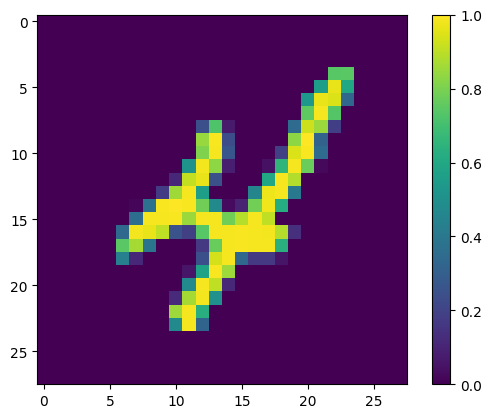

In [17]:
plt.figure
plt.imshow(train_data[9])
plt.colorbar()
plt.show

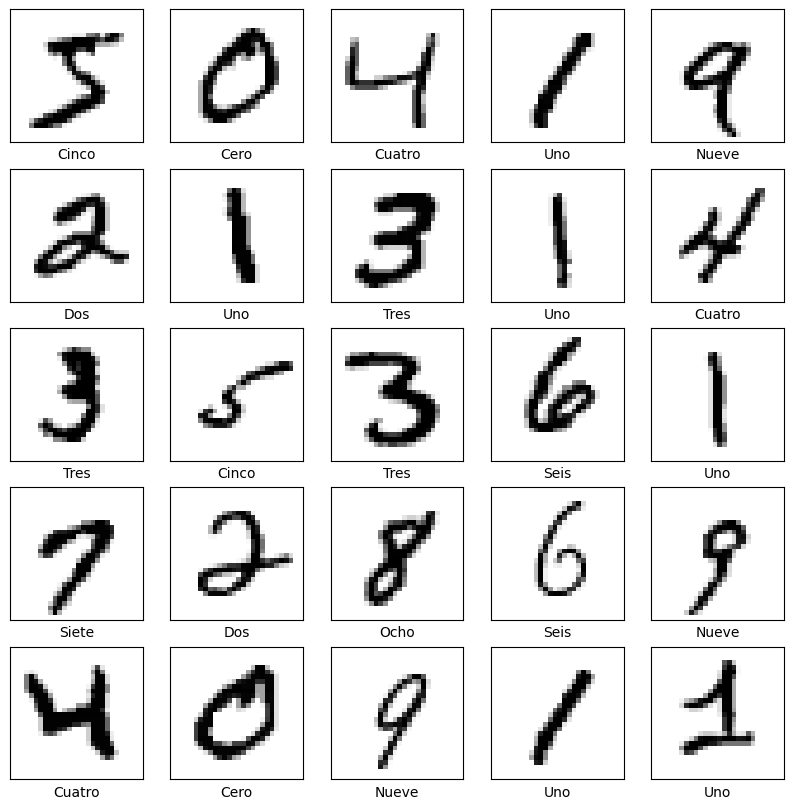

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_data[i], cmap=plt.cm.binary)
  plt.xlabel(label_names[train_labels[i]])
plt.show()

4. Selección y entrenamiento del modelo

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Capa de entrada
    tf.keras.layers.Dense(128, activation='relu'), # Capa oculta
    tf.keras.layers.Dense(10, activation='softmax') # Capa de salida
])

In [20]:
#compilación

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model.fit(train_data, train_labels, epochs = 9)

Epoch 1/9
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2580 - accuracy: 0.9261
Epoch 2/9
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1137 - accuracy: 0.9659
Epoch 3/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0796 - accuracy: 0.9760
Epoch 4/9
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0586 - accuracy: 0.9820
Epoch 5/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0441 - accuracy: 0.9862
Epoch 6/9
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0354 - accuracy: 0.9890
Epoch 7/9
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0281 - accuracy: 0.9911
Epoch 8/9
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0243 - accuracy: 0.9923
Epoch 9/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0186 - accuracy: 0.9941


5. Prueba del Modelo

In [23]:
#Precisión del modelo

test_loss, test_accuracy = model.evaluate(test_data, test_label)
print(f'Exactitud en datos de prueba: {test_accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0770 - accuracy: 0.9807
Exactitud en datos de prueba: 0.9807000160217285


In [61]:
#Predicciones

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% {} ({})".format(predicted_label,
                                          100*np.max(predictions_array),
                                          "Valor real:",
                                          true_label),
                                          color=color)


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="cyan")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [77]:
predictions = model.predict(test_data[:1000])
for i in range(15,20):
    prediction = tf.argmax(predictions[i]).numpy()
    actual_value = test_label[i]
    print(f'Predicción: {prediction}, Valor Real: {actual_value}')

32/32 [==============================] - 0s 2ms/step
Predicción: 5, Valor Real: 5
Predicción: 9, Valor Real: 9
Predicción: 7, Valor Real: 7
Predicción: 8, Valor Real: 3
Predicción: 4, Valor Real: 4


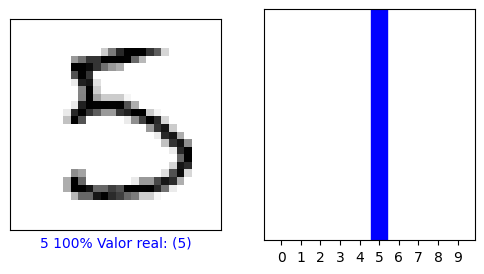

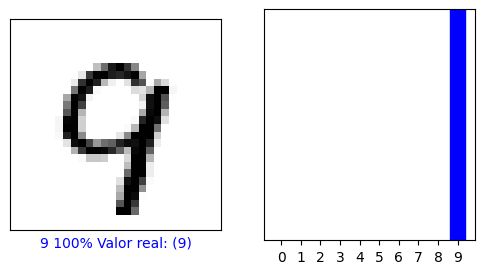

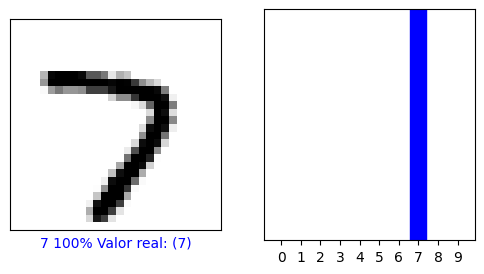

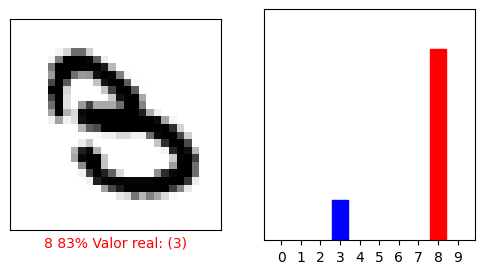

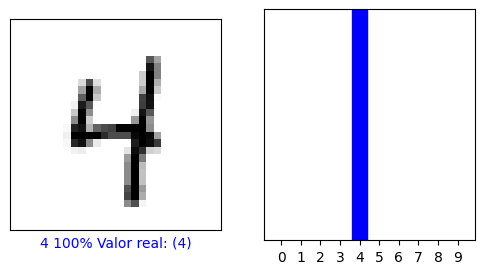

In [63]:
for i in range(15, 20):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_label, test_data)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i], test_label)
    plt.show()

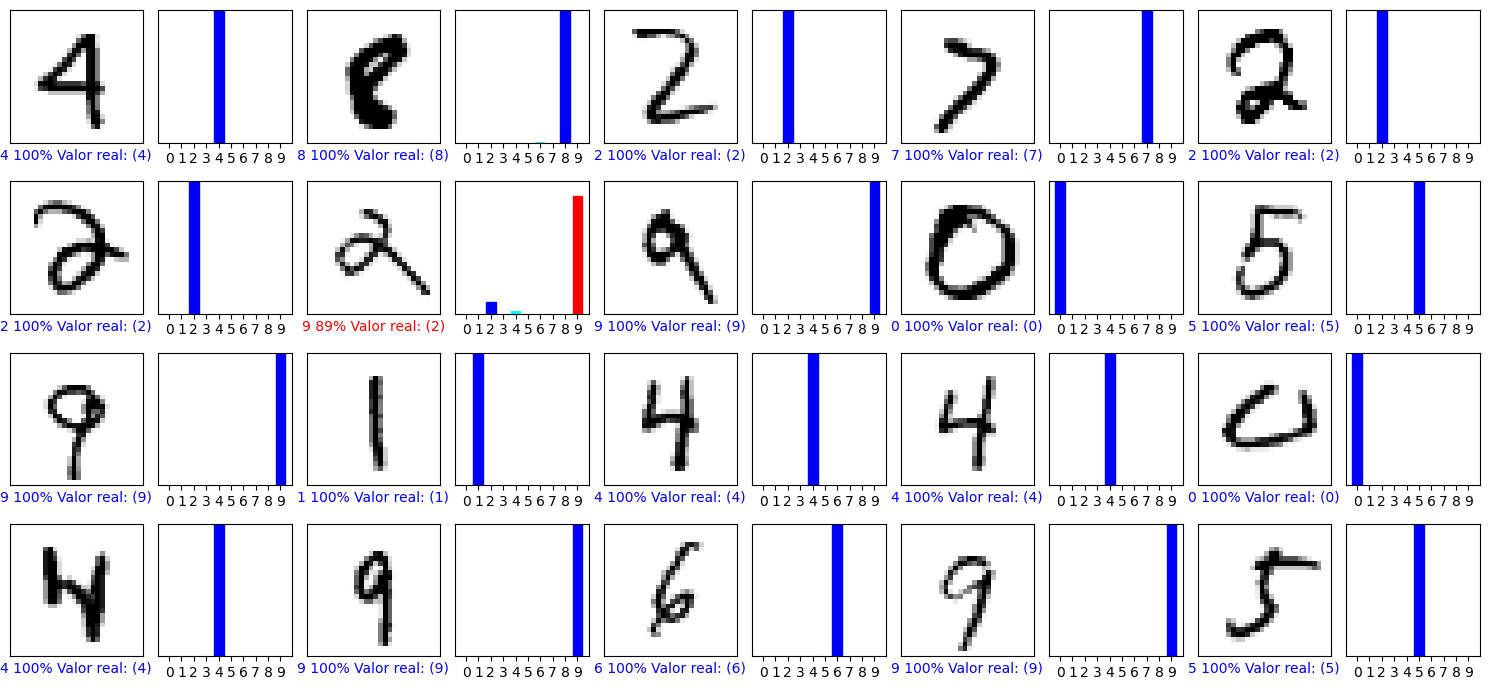

In [88]:
import random

random_indices = [random.randint(0, 1000) for i in range(20)]

num_rows = 4
num_cols = 5
total_plots = num_rows * num_cols

for i, index in enumerate(random_indices):
    if i % total_plots == 0:
        plt.figure(figsize=(15, 7))

    plt.subplot(num_rows, 2*num_cols, 2*(i % total_plots) + 1)
    plot_image(index, predictions[index], test_label, test_data)
    plt.subplot(num_rows, 2*num_cols, 2*(i % total_plots) + 2)
    plot_value_array(index, predictions[index], test_label)

    if (i + 1) % total_plots == 0:
        plt.tight_layout()
        plt.show()